In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras

from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

Using Theano backend.


In [4]:
ds = pd.read_csv('fer2013.csv')
d = ds.values
d.shape

(35887, 3)

In [5]:
tem = d[:, 1]
print(d.shape)
pixels = np.zeros((d.shape[0], 48*48))
print(pixels.shape)
for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])

(35887, 3)
(35887, 2304)


In [6]:
print (pixels.shape)
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)


(35887, 2304)


In [7]:
labels = d[:, 0]
print (labels.shape)

y = np_utils.to_categorical(labels)
print (y.shape)

(35887,)
(35887, 7)


In [8]:
split = int(0.80*pixels.shape[0])

x_train = pixels[:split]
y_train = y[:split]

x_test = pixels[split:]
y_test = y[split:]

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(28709, 2304) (7178, 2304)
(28709, 7) (7178, 7)


In [9]:
x_train = x_train.reshape((x_train.shape[0], 48, 48,1))
x_test = x_test.reshape((x_test.shape[0], 48, 48,1))

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(28709, 48, 48, 1) (7178, 48, 48, 1)
(28709, 7) (7178, 7)


In [13]:
np.random.seed(2222)
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,init='lecun_uniform'))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))

sgd = SGD(lr=0.055, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 19, 19, 32)        18464     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 32)        9248      
__________

In [296]:
hist = conv_model.fit(x_train, y_train,
                     nb_epoch=12,
                     shuffle=True,
                      batch_size=256,
                     validation_data=(x_test, y_test))

Train on 28709 samples, validate on 7178 samples
Epoch 1/30
28709/28709 [==============================] - 1141s - loss: 1.7691 - acc: 0.2727 - val_loss: 1.6367 - val_acc: 0.3522
Epoch 2/30
28709/28709 [==============================] - 1119s - loss: 1.6171 - acc: 0.3623 - val_loss: 1.5766 - val_acc: 0.4054
Epoch 3/30
28709/28709 [==============================] - 1083s - loss: 1.5120 - acc: 0.4147 - val_loss: 1.4266 - val_acc: 0.4556
Epoch 4/30
28709/28709 [==============================] - 1057s - loss: 1.4188 - acc: 0.4530 - val_loss: 1.3517 - val_acc: 0.4887
Epoch 5/30
28709/28709 [==============================] - 1100s - loss: 1.3635 - acc: 0.4771 - val_loss: 1.3222 - val_acc: 0.5000
Epoch 6/30
28709/28709 [==============================] - 1093s - loss: 1.3224 - acc: 0.4942 - val_loss: 1.2598 - val_acc: 0.5237
Epoch 7/30
28709/28709 [==============================] - 1086s - loss: 1.2815 - acc: 0.5090 - val_loss: 1.2736 - val_acc: 0.5149
Epoch 8/30
28709/28709 [=================

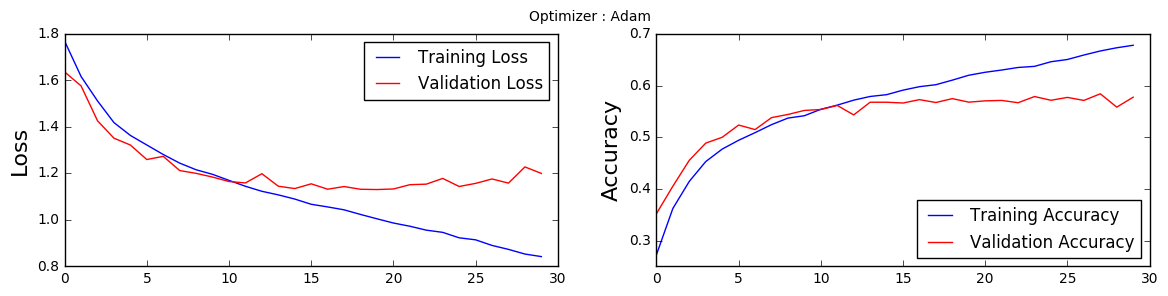

In [297]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
test = np.zeros((d.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

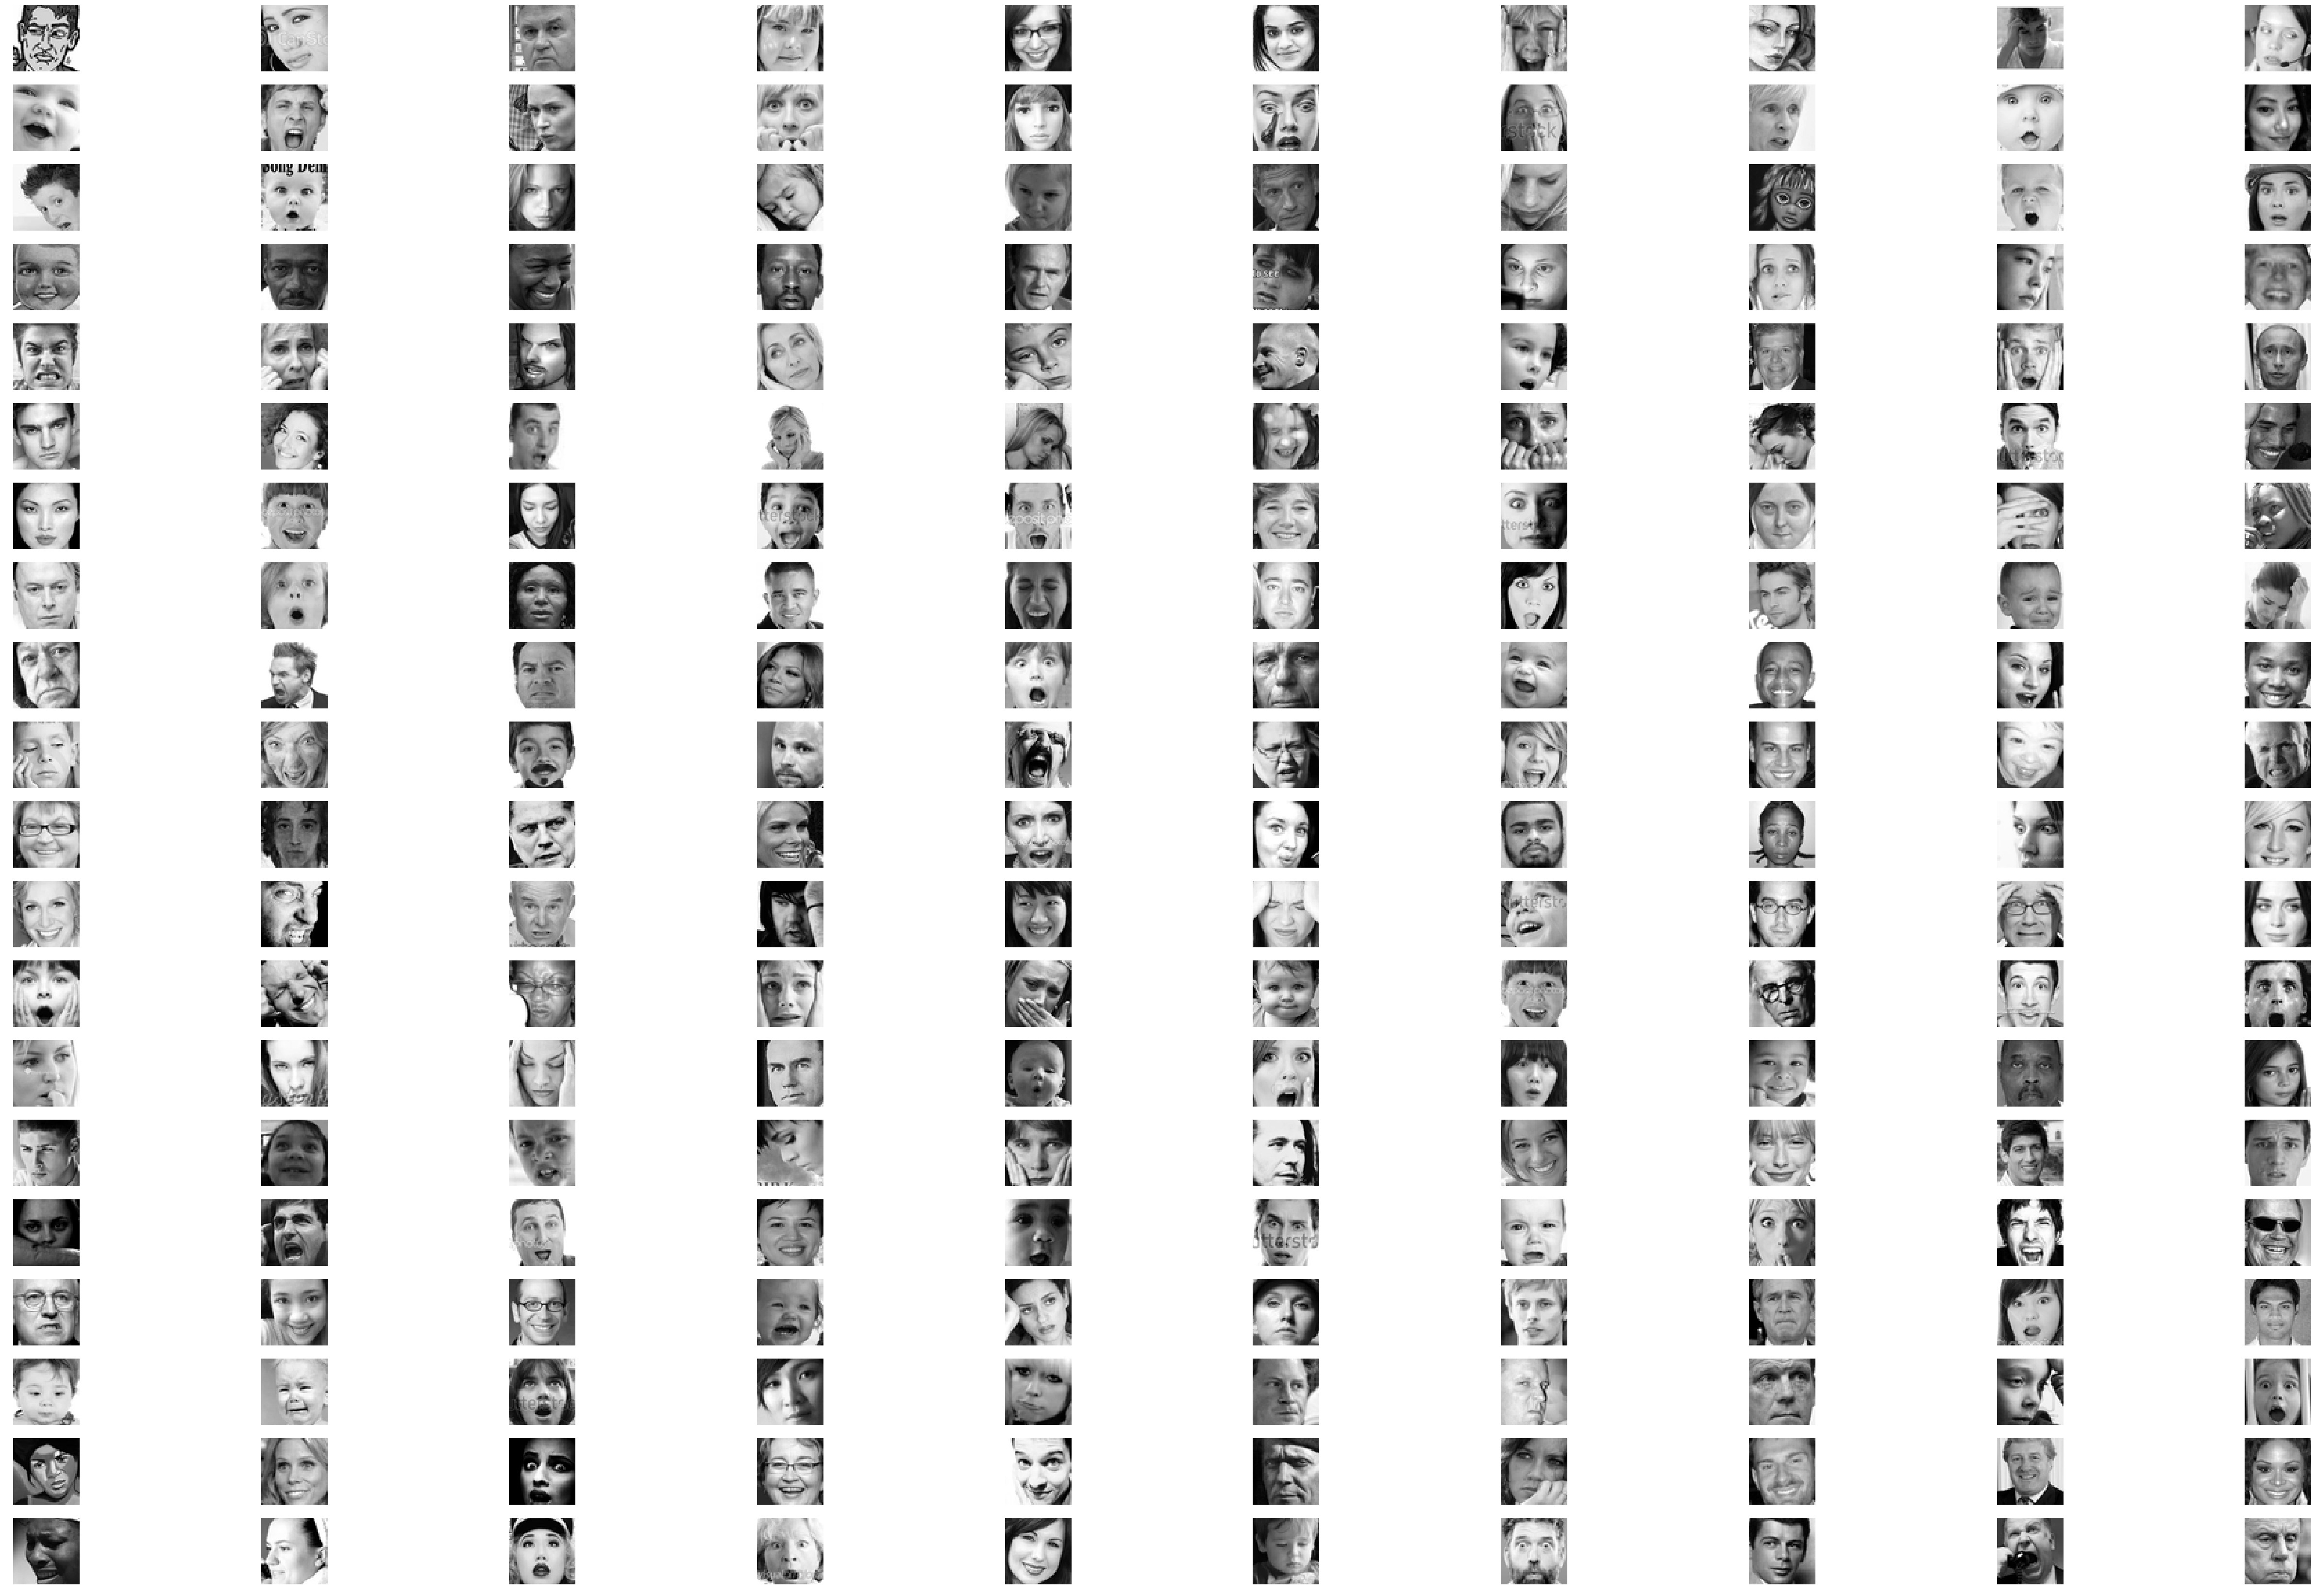

In [17]:
fig = plt.figure(figsize=(30,30))

for ix in range(200):
    ax = plt.subplot(30,10,ix+1)
    
    plt.imshow(test[split+ix].reshape((48, 48)),cmap='gray')
    plt.axis('off')

In [2]:
pre = x_test[:100]
print (pre.shape)
ans = conv_model.predict(pre, batch_size=3)

correct=0
for ix in range(100):
    if np.argmax(ans[ix]) == np.argmax(y_test[ix]):
        correct += 1
        
print (correct)

(100,1,48,48)
66


In [25]:
import h5py
import h5py
model.save('face_reco132.h5')  
f = h5py.File('face_reco132.h5', 'r+')
del f['optimizer_weights']
f.close()